In [1]:
import numpy
import scipy
import netCDF4
import matplotlib.pyplot as mp
import matplotlib.ticker
import matplotlib.colors

mp.rcParams.update({'mathtext.default': 'regular'})
% matplotlib inline

In [13]:
year_start = 402 #time_subsets[chunk,0]
year_end = 2200 #time_subsets[chunk,1]

# create season strings
years = numpy.arange(year_start, year_end+1, 1).astype(numpy.int)
half_years = numpy.arange(year_start+0.75, year_end, 1)
season_strings = numpy.empty(years.size-1, dtype=numpy.str)

season_strings = [str(years[i])+'-'+str(years[i+1]) for i in range(years.size-1)]
member_strings = ['{:03d}'.format(i) for i in range(1,36)]

n_seasons=year_end-year_start

In [14]:
working_dir = '/ninod/baird/cmip5/cmip5_calculations/attribution_2017/storm_counting/'
threshold='0.1'
#threshold='0.5'
#threshold='1.0'
#threshold='5.0'
#threshold='10.0'

#print('opening model '+'{:03d}'.format(i+1))
#print('{:03d}'.format(i+1))
dict_picontrol = numpy.load(working_dir + 'member_005_storm_counting_'+'{:04d}'.format(year_start)+'-'+'{:04d}'.format(year_end)+'_threshold_'+str(threshold)+'mmday.npy').item()
#dict_data = numpy.load(working_dir + 'storm_counting_decadal_chunks_'+start_year+'-'+end_year+'_threshold_'+threshold+'mmday.npy').item()

In [15]:
#print(dict_picontrol.keys())
print(dict_picontrol['402-403'])#.item()['1920-1921'].item()['storm_count'])

{'storm_magnitude_list': [0.1060468852519989, 14.64026015996933, 0.3498709499835968, 5.9331340789794922, 5.4523466229438782, 0.31724652647972107, 11.73124036192894, 0.41609783470630646, 0.54060182720422745, 15.970197319984436, 11.637668818235397, 0.10937076061964035, 19.630065888166428, 21.656246021389961, 8.2146121263504028, 3.5003253221511841, 0.57272446155548096, 33.338934242725372, 3.0736250877380371, 12.648453950881958, 0.64769268035888672, 40.014870584011078, 11.480708092451096, 5.3463078439235687, 0.58676505088806152, 0.21763698756694794], 'seasonal_total': 232.20897, 'storm_count': 26, 'storm_length_list': [1, 4, 1, 2, 2, 1, 5, 2, 2, 3, 6, 1, 3, 3, 4, 2, 2, 7, 4, 3, 3, 4, 4, 5, 2, 1]}


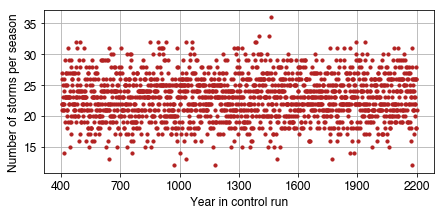

In [8]:
storm_counts = [dict_picontrol[s]['storm_count'] for s in season_strings]

fontsize=12
fig = mp.figure(figsize=(7,3))
ax = fig.add_subplot(111)
ax.scatter(half_years, storm_counts, c='firebrick', s=10)

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Number of storms per season', fontsize=fontsize)
ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
ax.grid()
ax.set_axisbelow(True)

fig.savefig('figs/number_of_storms_threshold_'+threshold+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')

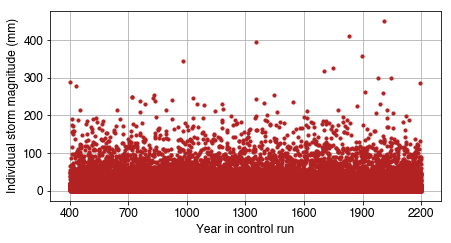

In [87]:
# storm magnitudes

fontsize=12
fig = mp.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

for s in range(n_seasons):
    yvals = dict_picontrol[season_strings[s]]['storm_magnitude_list']
    xvals = [half_years[s]]*len(yvals)
    ax.scatter(xvals, yvals, c='firebrick', s=10)

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Individual storm magnitude (mm)', fontsize=fontsize)
ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
#ax.set_yticks([0,250,500,750,1000,1250,1500])
ax.set_xlim(300,2300)

ax.grid()
ax.set_axisbelow(True)

fig.savefig('figs/storm_magnitude_threshold_'+threshold+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')

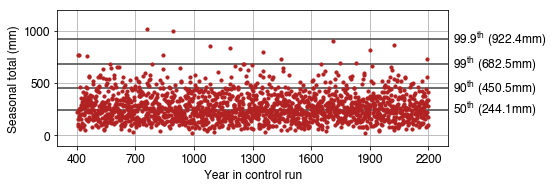

In [88]:
fontsize=12
fig = mp.figure(figsize=(7,2.5))
ax = fig.add_subplot(111)

seasonal_totals = [dict_picontrol[s]['seasonal_total'] for s in season_strings]

ax.scatter(half_years, seasonal_totals, c='firebrick', s=10, zorder=2)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Year in control run', fontsize=fontsize)
ax.set_ylabel('Seasonal total (mm)', fontsize=fontsize)
ax.set_xticks(numpy.arange(400,2201,300))#[400,500,750,1000,1250,1500,1750,2000,2200])
#ax.set_yticks([0,250,500,750,1000,1250,1500])
ax.set_xlim(300,2300)
ax.set_ylim(-100,1200)

perc50 = numpy.percentile(seasonal_totals, 50)
perc90 = numpy.percentile(seasonal_totals, 90)
perc99 = numpy.percentile(seasonal_totals, 99)
perc999 = numpy.percentile(seasonal_totals, 99.9)

ax.axhline(perc50, zorder=1, label='50th perc.', c='0.25')
ax.axhline(perc90, zorder=1, label='90th perc.', c='0.25')
ax.axhline(perc99, zorder=1, label='99th perc.', c='0.25')
ax.axhline(perc999, zorder=1, label='99.9th perc.', c='0.25')

ax.text(s='50$^{th}$ ('+'{:.1f}'.format(perc50)+'mm)', x=2325, y=perc50, ha='left', va='center', fontsize=fontsize)
ax.text(s='90$^{th}$ ('+'{:.1f}'.format(perc90)+'mm)', x=2325, y=perc90, ha='left', va='center', fontsize=fontsize)
ax.text(s='99$^{th}$ ('+'{:.1f}'.format(perc99)+'mm)', x=2325, y=perc99, ha='left', va='center', fontsize=fontsize)
ax.text(s='99.9$^{th}$ ('+'{:.1f}'.format(perc999)+'mm)', x=2325, y=perc999, ha='left', va='center', fontsize=fontsize)

ax.grid()
ax.set_axisbelow(True)

fig.savefig('figs/seasonal_total_threshold_'+threshold+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')

In [89]:
# histogram of storm sizes (both individual and seasonal totals!)

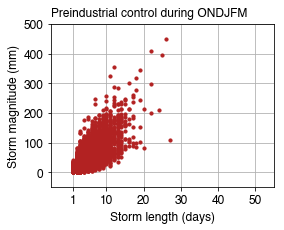

In [90]:
# storm magnitude versus storm length in days

#seasonal_total = numpy.sum(seas_PRECT[seas_PRECT>threshold])
#save_dict[season_strings[s]] = {'storm_count' : storm_count}
#save_dict[season_strings[s]]['storm_magnitude_list'] = storm_magnitude_list
#save_dict[season_strings[s]]['storm_length_list'] = storm_length_list
#save_dict[season_strings[s]]['seasonal_total'] = seasonal_total

# need to sum values for each season
all_magnitudes = [dict_picontrol[s]['storm_magnitude_list'] for s in season_strings]
all_magnitudes_flatten = numpy.array([item for sublist in all_magnitudes for item in sublist])

all_lengths = [dict_picontrol[s]['storm_length_list'] for s in season_strings]
all_lengths_flatten = numpy.array([item for sublist in all_lengths for item in sublist])
#print(len(all_magnitudes))
numpy.percentile(all_magnitudes_flatten, 99.9)

fontsize=12
fig = mp.figure(figsize=(4,3))
ax = fig.add_subplot(111)

ax.scatter(all_lengths_flatten, all_magnitudes_flatten, s=10, c='firebrick')

ax.tick_params(labelsize=fontsize)
ax.set_xlabel('Storm length (days)', fontsize=fontsize)
ax.set_ylabel('Storm magnitude (mm)', fontsize=fontsize)
ax.set_xlim(-5,55)
ax.set_ylim(-50,500)
ax.set_xticks([1,10,20,30,40,50])
ax.grid()
ax.set_axisbelow(True)

ax.text(s='Preindustrial control during ONDJFM', x=0, y=1.05, transform=ax.transAxes, fontsize=fontsize)

fig.savefig('figs/storm_magnitude_versus_length_threshold_'+threshold+'mmday_LosAngeles_picontrol.pdf', transparent=True, bbox_inches='tight')

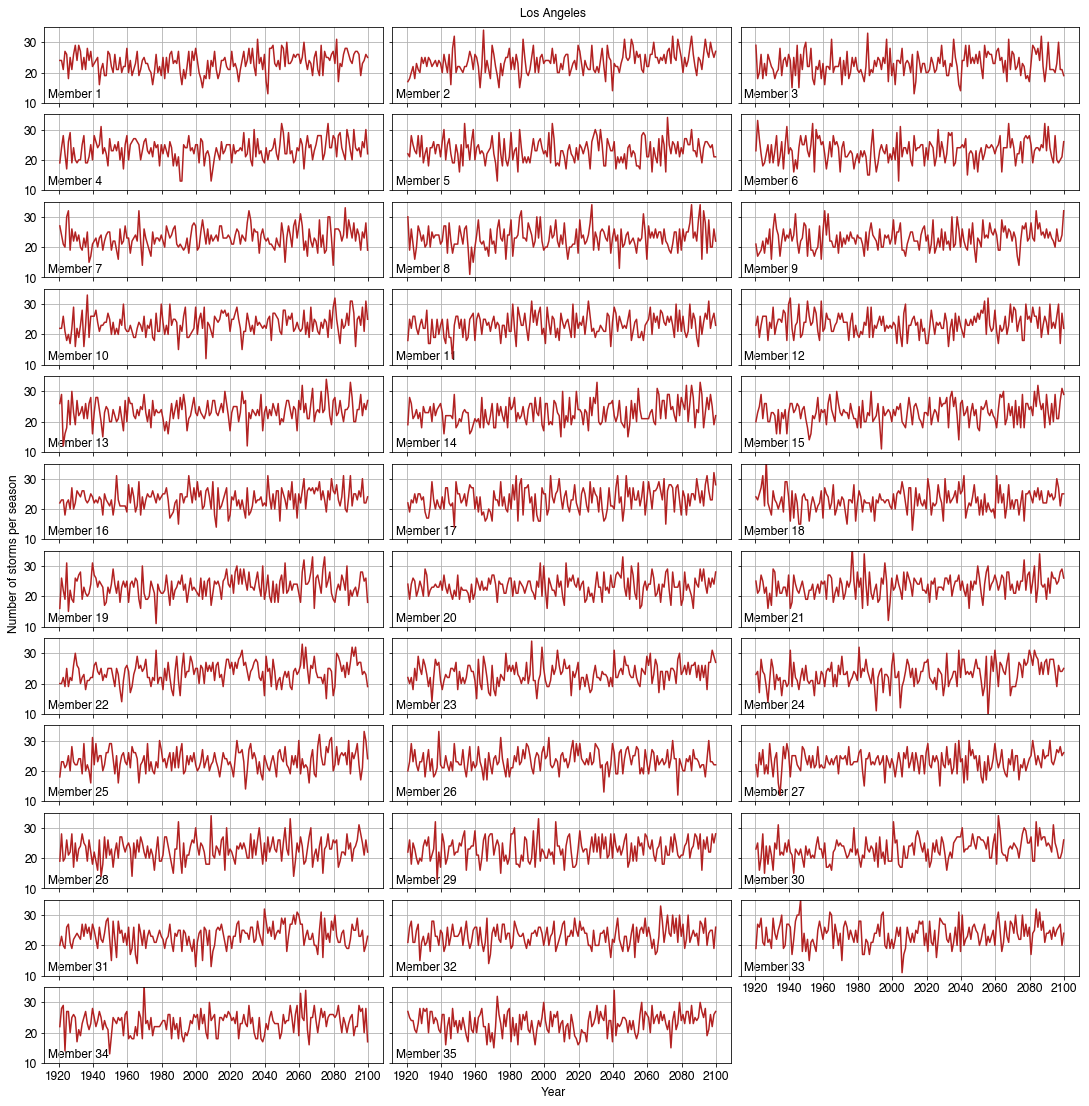

In [20]:
# storms per season PANEL
fontsize=12
fig = mp.figure(figsize=(15,15))

for i in range(35):
    
    ax = fig.add_subplot(12,3,i+1)

    ax.text(s='Member '+str(i+1), x=0.01, y=0.03, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize, zorder=0)
    
    storm_counts = [dict_all_models['{:03d}'.format(i+1)].item()[s]['storm_count'] for s in season_strings]
    ax.plot(half_years, storm_counts, color='firebrick', zorder=1)
    
    if i in numpy.arange(0,33,3):
        ax.tick_params(labelsize=fontsize, axis='both', labelbottom='off')#, labelleft='off', labelbottom='off')
    elif i in [32,34]:
        ax.tick_params(labelsize=fontsize, axis='both', labelleft='off')
    elif i in [33]:
        ax.tick_params(labelsize=fontsize, axis='both')
    else:
        ax.tick_params(labelsize=fontsize, axis='both', labelleft='off', labelbottom='off')
    ax.grid()
    ax.set_axisbelow(True)
    ax.set_xticks([1920,1940,1960,1980,2000,2020,2040,2060,2080,2100])
    ax.set_ylim(10,35)

fig.text(s='Number of storms per season', x=0, y=0.5, ha='center', va='center', transform = fig.transFigure, fontsize=fontsize, rotation=90)
fig.text(s='Year', x=0.5, y=0, ha='center', va='center', transform = fig.transFigure, fontsize=fontsize)
fig.text(s='Los Angeles', x=0.5, y=1.0, ha='center', va='center', transform = fig.transFigure, fontsize=fontsize)
fig.tight_layout(w_pad=0.25, h_pad=-0.75)#w_pad=0)#.25, h_pad=0.25)

fig.savefig('figs/number_of_storms_threshold_'+threshold+'mmday_PANEL_LosAngeles.pdf', transparent=True, bbox_inches='tight')

In [287]:
storm_count_flatten = [item for sublist in storm_count_list_all for item in sublist]
storm_magnitude_flatten = [item for sublist in storm_magnitude_list_all for item in sublist]
storm_length_flatten = [item for sublist in storm_length_list_all for item in sublist]

In [288]:
storm_count_flatten = []
storm_count_flatten = storm_count_list_all[0]
for i in range(1,9):
    storm_count_flatten+=storm_count_list_all[i]
print(len(storm_count_flatten))
print(len(storm_magnitude_flatten))
print(numpy.sum(storm_count_flatten))
print(storm_count_flatten)

180
4186
4186
[27, 25, 24, 24, 21, 20, 23, 28, 23, 28, 27, 28, 20, 27, 27, 23, 25, 24, 21, 20, 26, 26, 16, 22, 25, 18, 28, 22, 24, 20, 24, 21, 25, 22, 19, 17, 27, 21, 20, 25, 19, 25, 26, 28, 22, 22, 16, 23, 17, 20, 15, 22, 32, 26, 23, 18, 26, 22, 27, 28, 17, 25, 19, 23, 16, 26, 21, 26, 24, 27, 21, 20, 24, 20, 16, 21, 24, 22, 25, 30, 24, 21, 20, 27, 22, 26, 25, 27, 20, 23, 24, 17, 22, 23, 18, 26, 23, 19, 18, 16, 16, 21, 20, 20, 17, 24, 27, 22, 23, 25, 29, 23, 27, 25, 24, 29, 18, 24, 24, 17, 33, 19, 23, 22, 23, 25, 25, 24, 20, 24, 21, 24, 20, 18, 20, 26, 30, 21, 27, 26, 24, 20, 29, 23, 25, 26, 23, 27, 24, 26, 23, 21, 24, 15, 24, 27, 21, 23, 30, 24, 26, 23, 27, 27, 23, 29, 23, 25, 24, 25, 30, 27, 25, 28, 19, 21, 26, 22, 26, 27]


In [289]:
d_oct = 31
d_nov = 30
d_dec = 31
d_jan = 31
d_feb = 28
d_mar = 31
days_per_season = d_oct+d_nov+d_dec+d_jan+d_feb+d_mar
print(days_per_season)

years = numpy.arange(1920.5, 2099.5+1, 1)
print(years.shape)

182
(180,)


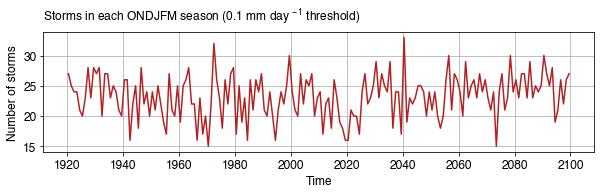

In [290]:
fig = mp.figure(figsize=(8.5,2.5))

fontsize=12

ax = fig.add_subplot(111)
ax.plot(years, storm_count_flatten, color='firebrick')
ax.set_xlabel('Time', fontsize=fontsize)
ax.set_ylabel('Number of storms', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xticks([1920,1940,1960,1980,2000,2020,2040,2060,2080,2100])
ax.grid()
#ax.set_xlim(1920,1925)

ax.text(s='Storms in each ONDJFM season ('+threshold+' mm day$^{\, -1}$ threshold)', x=0, y=1.05, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()
fig.savefig('figs/number_of_storms_threshold_'+threshold+'mmday.pdf', transparent=True, bbox_inches='tight')

In [291]:
minval=0. # for inferno:  0.18
maxval=0.8 # for inferno: 1.0
n=256
full_cmap = mp.get_cmap('inferno')
cmap_partial = matplotlib.colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=full_cmap.name, a=minval, b=maxval), full_cmap(numpy.linspace(minval, maxval, n)))

4186


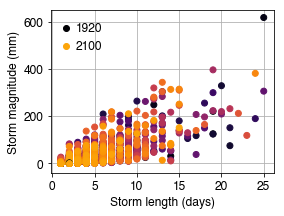

In [292]:
fig = mp.figure(figsize=(4,3))

fontsize=12

color_list = cmap_partial(numpy.arange(len(storm_length_flatten))/(len(storm_length_flatten)-1))

ax = fig.add_subplot(111)
ax.scatter(storm_length_flatten[0], storm_magnitude_flatten[0], color=color_list[0,:], label='1920')
ax.scatter(storm_length_flatten[1:len(storm_length_flatten)], storm_magnitude_flatten[1:len(storm_length_flatten)], color=color_list[1:len(storm_length_flatten)-1,:])
ax.scatter(storm_length_flatten[-1], storm_magnitude_flatten[-1], color=color_list[-1,:], label='2100')
ax.set_xlabel('Storm length (days)', fontsize=fontsize)
ax.set_ylabel('Storm magnitude (mm)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
#ax.set_xticks([1920,1940,1960,1980,2000,2020,2040,2060,2080,2100])
ax.grid()

print(len(storm_length_flatten))

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles,labels,fontsize=fontsize, fancybox=False, framealpha=0, handlelength=0, labelspacing=0.5, bbox_to_anchor=(0.02,0.99), loc='upper left')

ax.set_axisbelow(True)

In [293]:
print(storm_count_flatten)
print(len(storm_count_flatten))

[27, 25, 24, 24, 21, 20, 23, 28, 23, 28, 27, 28, 20, 27, 27, 23, 25, 24, 21, 20, 26, 26, 16, 22, 25, 18, 28, 22, 24, 20, 24, 21, 25, 22, 19, 17, 27, 21, 20, 25, 19, 25, 26, 28, 22, 22, 16, 23, 17, 20, 15, 22, 32, 26, 23, 18, 26, 22, 27, 28, 17, 25, 19, 23, 16, 26, 21, 26, 24, 27, 21, 20, 24, 20, 16, 21, 24, 22, 25, 30, 24, 21, 20, 27, 22, 26, 25, 27, 20, 23, 24, 17, 22, 23, 18, 26, 23, 19, 18, 16, 16, 21, 20, 20, 17, 24, 27, 22, 23, 25, 29, 23, 27, 25, 24, 29, 18, 24, 24, 17, 33, 19, 23, 22, 23, 25, 25, 24, 20, 24, 21, 24, 20, 18, 20, 26, 30, 21, 27, 26, 24, 20, 29, 23, 25, 26, 23, 27, 24, 26, 23, 21, 24, 15, 24, 27, 21, 23, 30, 24, 26, 23, 27, 27, 23, 29, 23, 25, 24, 25, 30, 27, 25, 28, 19, 21, 26, 22, 26, 27]
180


In [294]:
storm_magnitudes_by_year = []
for i in range(years.size):
    storm_magnitudes_by_year.append(list(storm_magnitude_flatten[ sum(storm_count_flatten[0:i]):sum(storm_count_flatten[0:i+1])]))

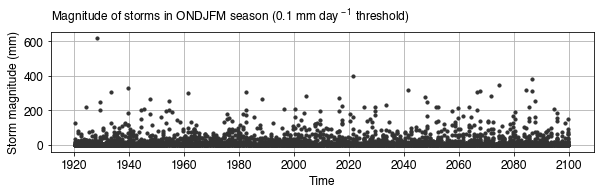

In [295]:
# storm magnitude of storms over time?

fig = mp.figure(figsize=(8.5,2.5))
fontsize=12
ax = fig.add_subplot(111)
for i in range(years.size):
    ax.scatter([years[i]]*storm_count_flatten[i], storm_magnitudes_by_year[i], s=10, c='0.2')
#ax.plot(years, storm_magnitude_flatten, color='firebrick')
ax.set_xlabel('Time', fontsize=fontsize)
ax.set_ylabel('Storm magnitude (mm)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xticks([1920,1940,1960,1980,2000,2020,2040,2060,2080,2100])
ax.grid()
#ax.set_xlim(1920,1925)

ax.set_axisbelow(True)
ax.text(s='Magnitude of storms in ONDJFM season ('+threshold+' mm day$^{\, -1}$ threshold)', x=0, y=1.05, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()
fig.savefig('figs/magnitude_of_storms_by_year_threshold_'+threshold+'mmday.pdf', transparent=True, bbox_inches='tight')

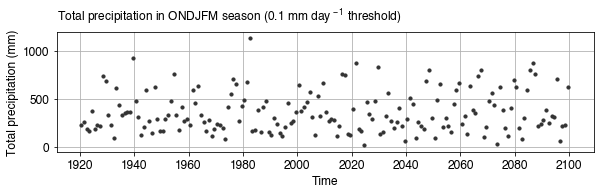

In [296]:
# TOTAL season rainfall

fig = mp.figure(figsize=(8.5,2.5))
fontsize=12
ax = fig.add_subplot(111)
for i in range(years.size):
    ax.scatter(years[i], sum(storm_magnitudes_by_year[i]), s=10, color='0.2')

ax.set_xlabel('Time', fontsize=fontsize)
ax.set_ylabel('Total precipitation (mm)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xticks([1920,1940,1960,1980,2000,2020,2040,2060,2080,2100])
ax.grid()
#ax.set_xlim(1920,1925)

ax.set_axisbelow(True)
ax.text(s='Total precipitation in ONDJFM season ('+threshold+' mm day$^{\, -1}$ threshold)', x=0, y=1.05, ha='left', va='bottom', transform=ax.transAxes, fontsize=fontsize)

fig.tight_layout()
fig.savefig('figs/total_precip_of_storms_by_year_threshold_'+threshold+'mmday.pdf', transparent=True, bbox_inches='tight')

In [246]:
storm_length_list_hist = numpy.array(dict_hist['storm_length_list'])
storm_magnitude_list_hist = numpy.array(dict_hist['storm_magnitude_list'])
storm_count_list_hist = numpy.array(dict_hist['storm_count_list'])

storm_length_list_rcp85 = numpy.array(dict_rcp85['storm_length_list'])
storm_magnitude_list_rcp85 = numpy.array(dict_rcp85['storm_magnitude_list'])
storm_count_list_rcp85 = numpy.array(dict_rcp85['storm_count_list'])

NameError: name 'dict_hist' is not defined

NameError: name 'storm_length_list_rcp85' is not defined

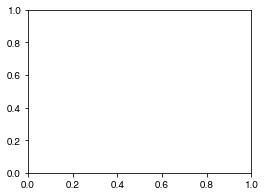

In [26]:
fontsize=12

fig = mp.figure(figsize=(4,3))

ax = fig.add_subplot(111)
ax.scatter(storm_length_list_rcp85, storm_magnitude_list_rcp85, s=20, c='firebrick', label='RCP8.5')
ax.scatter(storm_length_list_hist, storm_magnitude_list_hist, s=20, c='0.2', label='historical')
ax.set_xlabel('Storm length (days)', fontsize=fontsize)
ax.set_ylabel('Storm magnitude (mm)', fontsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.grid()
ax.set_xticks([1,10,20,30,40])
ax.set_axisbelow(True)
ax.set_ylim(-50,800)
ax.set_xlim(-0.75,40)
#ax.text(s='All members (1981-2000)', x=0, y=1.05, transform=ax.transAxes, fontsize=fontsize)

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, scatterpoints=1, bbox_to_anchor=(0.03,0.97), \
          bbox_transform=ax.transAxes, loc='upper left', borderaxespad=0, labelspacing=0.25, \
          fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, \
          handletextpad=0.5, markerscale=1, handlelength=0)

mp.savefig('figs/magnitude_vs_length_historical_and_rcp85_threshold_'+threshold+'mmday.pdf', transparent=True, bbox_inches='tight')

### Create histogram for event sizes

In [7]:
#bins = numpy.logspace(-2,numpy.log10(PRECT_ONDJFM_CA.max()),100) # log spaced bins
bins = numpy.linspace(0,600,100)
bins = numpy.logspace(-10,numpy.log10(storm_magnitude_list_hist.max()),200) # log spaced bins
hist_histogram, bin_edges = numpy.histogram(storm_magnitude_list_hist, bins=bins, density=False)
hist_bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
hist_bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

In [8]:
#bins = numpy.linspace(0,600,100)
bins = numpy.logspace(-10,numpy.log10(storm_magnitude_list_hist.max()),200)
rcp_histogram, bin_edges = numpy.histogram(storm_magnitude_list_rcp85, bins=bins, density=False)
rcp_bin_centers = (bin_edges[:-1] + bin_edges[1:])/2
rcp_bin_width = numpy.diff(bin_edges) # same as bin_edges[1:]-bin_edges[:-1]

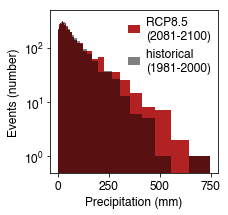

In [34]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)

bar1 = ax.bar(rcp_bin_centers, rcp_histogram, align='center', width=hist_bin_width, color='firebrick', label='RCP8.5 \n(2081-2100)')
bar2 = ax.bar(hist_bin_centers, hist_histogram, align='center', width=hist_bin_width, color='0', linewidth=0, label='historical \n(1981-2000)', alpha=0.5)
#ax.step(bin_centers, hist_histogram, where='mid',color='0')
#ax.scatter(rcp_bin_centers, rcp_histogram, color='firebrick', label='RCP8.5')

#import pprint
#pprint.pprint(vars(bar1))
#for i in bar1.patches:
#    i.set_edgecolor('None')
#ax.set_xlim(bins[0], bins[-1])

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Events (number)', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm)', fontsize=fontsize)
ax.set_yscale('log') # 'symlog'
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.set_ylim(0.5,500)
ax.minorticks_off()
#ax.grid()
#ax.set_axisbelow(True)

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(0.98,0.98), bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.5, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, handletextpad=0.5, handlelength=1)

mp.savefig('figs/histogram_event_numbers_rcp85_vs_historical.pdf', transparent=True, bbox_inches='tight')

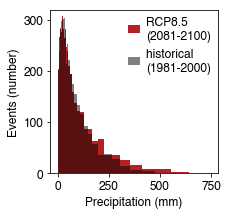

In [37]:
fig = mp.figure(figsize=(3,3))
fontsize=12

ax = fig.add_subplot(111)

bar1 = ax.bar(rcp_bin_centers, rcp_histogram, align='center', width=hist_bin_width, color='firebrick', label='RCP8.5 \n(2081-2100)')
bar2 = ax.bar(hist_bin_centers, hist_histogram, align='center', width=hist_bin_width, color='0', linewidth=0, label='historical \n(1981-2000)', alpha=0.5)
#ax.step(bin_centers, hist_histogram, where='mid',color='0')
#ax.scatter(rcp_bin_centers, rcp_histogram, color='firebrick', label='RCP8.5')

#import pprint
#pprint.pprint(vars(bar1))
#for i in bar1.patches:
#    i.set_edgecolor('None')
#ax.set_xlim(bins[0], bins[-1])

ax.tick_params(labelsize=fontsize)
ax.set_ylabel('Events (number)', fontsize=fontsize)
ax.set_xlabel('Precipitation (mm)', fontsize=fontsize)
#ax.set_yscale('log') # 'symlog'
ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator(2))

ax.set_ylim(0.5,320)
ax.minorticks_off()
#ax.grid()
#ax.set_axisbelow(True)

handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, fontsize=fontsize, bbox_to_anchor=(0.98,0.98), bbox_transform=ax.transAxes, loc='upper right', borderaxespad=0, labelspacing=0.5, fancybox=False, edgecolor='0', framealpha=0, borderpad=0.25, handletextpad=0.5, handlelength=1)

mp.savefig('figs/histogram_event_numbers_rcp85_vs_historical_linear_yaxis.pdf', transparent=True, bbox_inches='tight')